In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/home/exam/Documents/soni157.csv")
df

,Hours,Scores
0,3.2,5.9
1,2.9,4.6
2,2.8,6.2
3,3.2,4.7
4,4.2,5.5
5,3.0,5.0
6,3.1,4.9
7,3.1,6.7
8,3.8,5.1
9,3.0,6.0


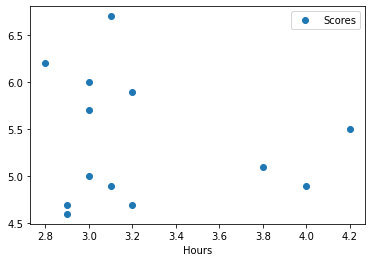

In [6]:
df.plot(x="Hours", y="Scores", style="o")
plt.show()

In [7]:
x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)

3.2461538461538457 5.376923076923077


In [8]:
df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - x_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,Hours,Scores,x,y,x*y,x^2,y^2
0,3.2,5.9,-0.046154,2.653846,-0.122485,0.002130,7.042899
1,2.9,4.6,-0.346154,1.353846,-0.468639,0.119822,1.832899
2,2.8,6.2,-0.446154,2.953846,-1.317870,0.199053,8.725207
3,3.2,4.7,-0.046154,1.453846,-0.067101,0.002130,2.113669
4,4.2,5.5,0.953846,2.253846,2.149822,0.909822,5.079822
5,3.0,5.0,-0.246154,1.753846,-0.431716,0.060592,3.075976
6,3.1,4.9,-0.146154,1.653846,-0.241716,0.021361,2.735207
7,3.1,6.7,-0.146154,3.453846,-0.504793,0.021361,11.929053
8,3.8,5.1,0.553846,1.853846,1.026746,0.306746,3.436746
9,3.0,6.0,-0.246154,2.753846,-0.677870,0.060592,7.583669


In [9]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

-0.5161538461538336 2.4523076923076927 64.42538461538464


In [10]:
correlation = summation_x_y / (summation_x_squared *
summation_y_squared)**0.5
correlation

-0.0410641821508673

In [12]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [13]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [14]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

0.4343259757997879 0.6446869796848296


In [15]:
m = correlation * (std_deviation_y / std_deviation_x)
m

-0.060953166605613965

In [16]:
c = df["Scores"].mean() - m * df["Hours"].mean()
c

5.574786433135147

In [17]:
df["y_prediction"] = m * df["Hours"] + c
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction
0,3.2,5.9,-0.046154,2.653846,-0.122485,0.002130,7.042899,5.379736
1,2.9,4.6,-0.346154,1.353846,-0.468639,0.119822,1.832899,5.398022
2,2.8,6.2,-0.446154,2.953846,-1.317870,0.199053,8.725207,5.404118
3,3.2,4.7,-0.046154,1.453846,-0.067101,0.002130,2.113669,5.379736
4,4.2,5.5,0.953846,2.253846,2.149822,0.909822,5.079822,5.318783
5,3.0,5.0,-0.246154,1.753846,-0.431716,0.060592,3.075976,5.391927
6,3.1,4.9,-0.146154,1.653846,-0.241716,0.021361,2.735207,5.385832
7,3.1,6.7,-0.146154,3.453846,-0.504793,0.021361,11.929053,5.385832
8,3.8,5.1,0.553846,1.853846,1.026746,0.306746,3.436746,5.343164
9,3.0,6.0,-0.246154,2.753846,-0.677870,0.060592,7.583669,5.391927


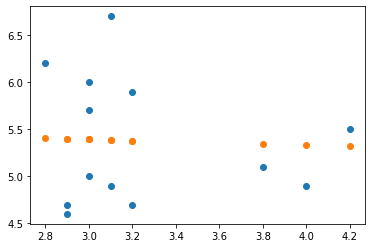

In [18]:
plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.scatter(df["Hours"], df["y_prediction"])
plt.show()